<a href="https://colab.research.google.com/github/RubenCarty/Master-Artificial-Intelligence-UNIR/blob/main/Sol_ML_Unsupervised_act1_RubenQuispe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

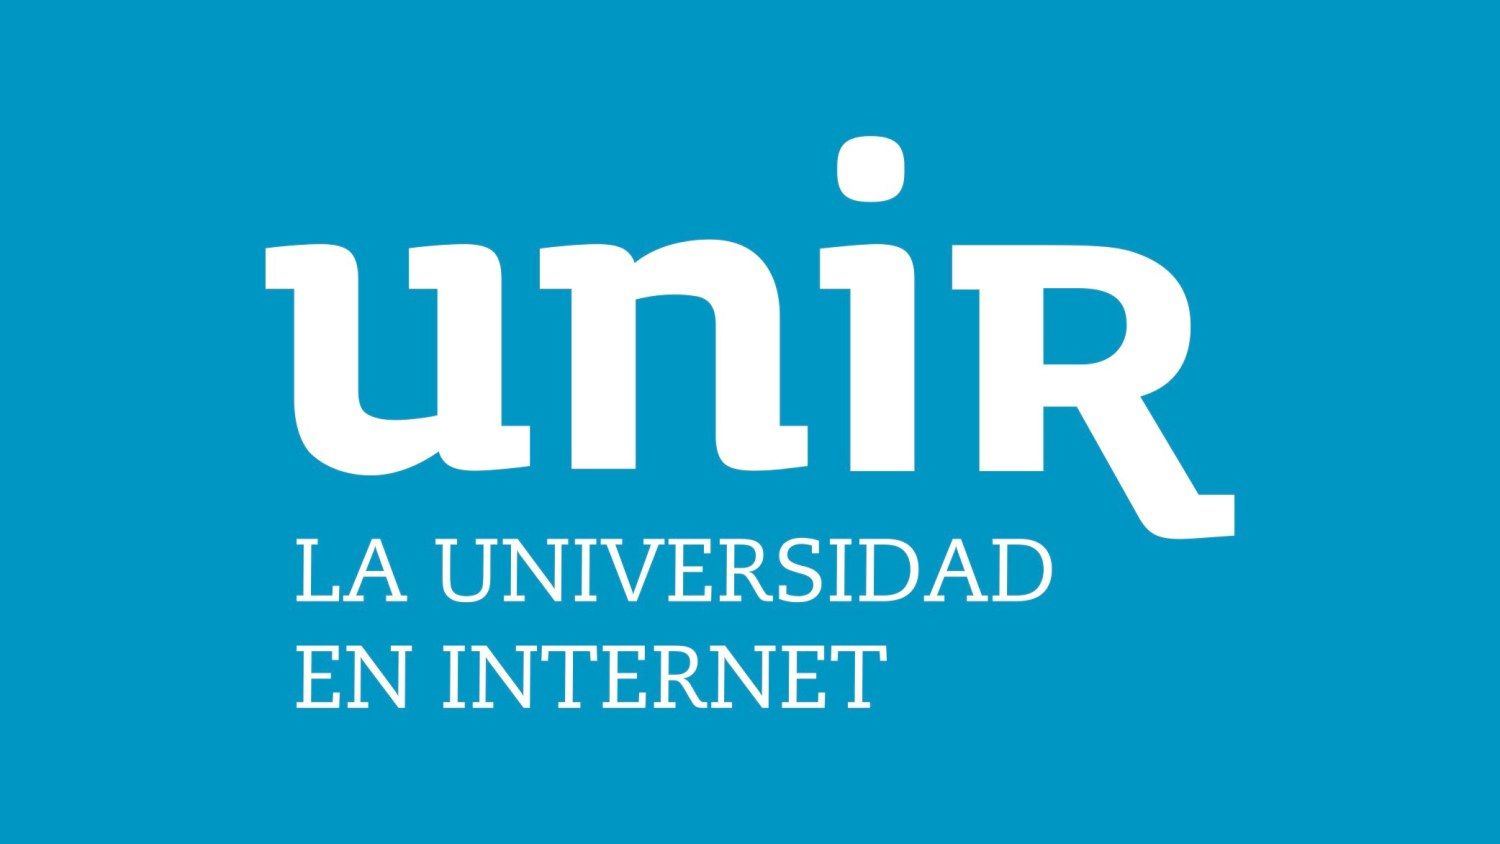

<center>

# **Actividad 1: Exploración y comparación de algoritmos de agrupamiento**

   # **Curso: Aprendizaje Automático no Supervisado**

# **Máster Universitario en Inteligencia Artificial**
# [Student: RUBEN QUISPE](https://www.linkedin.com/in/ruben-quispe-l/)

</center>

![image-2.png](attachment:image-2.png)
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Técnicas de agrupamiento

## Objetivos

- Entender los métodos de clustering K-means, jerárquico y DBSCAN.
- Generar agrupamientos con los métodos de clustering previamente indicados y realizar una comparativa.
- Investigar sobre una técnica de agrupamiento con un caso de uso concreto.


## Descripción de la actividad

El conjunto de datos con el cual vamos a trabajar se encuentra en el siguiente enlace: https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data

Este conjunto de datos contiene datos de sensores recopilados de varias máquinas, con el objetivo de predecir fallos de las máquinas con antelación. Incluye una variedad de lecturas de sensores, así como las fallas de la máquina registradas.

### Tareas a realizar
- Clustering
  - Debes completar el código pedido en este notebook y contestar las preguntas finales.
  - Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de técnicas de agrupamiento. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para cada artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección de anomalías.
    - Técnicas de detección de anomalías empleadas.
    - Principales resultados de la aplicación y de la investigación.


#### Nombre del estudiante

In [2]:
# Coloca en este espacio el nombre del estudiante
 # Ruben Quispe Llacctarimay

### Clustering

Comenzamos importando las librerías necesarias y cargando el dataset.

Este archivo contiene 944 mediciones de sensores de diferentes máquinas, contiene una etiqueta de si tiene fallo o no.

Notas:
1. footfall: The number of people or objects passing by the machine.
2. tempMode: The temperature mode or setting of the machine.
3. AQ: Air quality index near the machine.
4. USS: Ultrasonic sensor data, indicating proximity measurements.
5. CS: Current sensor readings, indicating the electrical current usage of the machine.
6. VOC: Volatile organic compounds level detected near the machine.
7. RP: Rotational position or RPM (revolutions per minute) of the machine parts.
8. IP: Input pressure to the machine.
9. Temperature: The operating temperature of the machine.
10. fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

# Parte 1: Carga y Exploración de Datos

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# se carga el dataset, con separados
df = pd.read_csv('/content/drive/MyDrive/UNIR/ML_US/muinar07_act1_data.csv', sep=',')

In [90]:
df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


#### ¿Cuántas instancias tiene el dataset?

In [91]:
##indica aquí tu respuesta
num_instancias = df.shape[0]
print(f"El dataset tiene {num_instancias} instancias.")

El dataset tiene 944 instancias.


Respuesta: El dataset tiene 944 instancias. Esto significa que hay 944 filas de datos correspondientes a las lecturas de los sensores y fallas.

#### ¿Cuál es el tipo de datos predominante en el dataset?

In [92]:
##_indica aquí tu respuesta_
df.dtypes

,0
footfall,int64
tempMode,int64
AQ,int64
USS,int64
CS,int64
VOC,int64
RP,int64
IP,int64
Temperature,int64
fail,int64


#### ¿Son variables continuas o categóricas?

#_indica aquí tu respuesta_

Respuesta: La mayoría de las columnas en el dataset contienen datos numéricos (tipo int64), lo que significa que estamos trabajando principalmente con variables continuas.

#### ¿cuáles son los valores mínimo y máximo de la variable 'RP'?

In [93]:
# Descripción de la variable 'RP'
rp_stats = df['RP'].describe()
print(rp_stats[['min', 'max']])


min    19.0
max    91.0
Name: RP, dtype: float64


### _indica aquí tu respuesta_

Respuesta: Las variables son en su mayoría continuas. El valor mínimo de la variable 'RP' es 19.0 y el máximo es 91.0

#### Para los algoritmos de clustering el dataset no puede tener instancias con datos faltantes. ¿Tiene este dataset datos faltantes?

In [94]:
df.isnull().sum()


,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


#_indica aquí tu respuesta_

Respuesta: El dataset no tiene datos faltantes, por lo que no es necesario un tratamiento adicional sobre los datos.

#### Elimine la variable fail

In [95]:
#_indica aquí tu respuesta_
df = df.drop('fail', axis=1)


In [96]:
df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
0,0,7,7,1,6,6,36,3,1
1,190,1,3,3,5,1,20,4,1
2,31,7,2,2,6,1,24,6,1
3,83,4,3,4,5,1,28,6,1
4,640,7,5,6,4,0,68,6,1
...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24
940,0,7,5,2,6,6,50,6,24
941,0,3,6,2,7,5,43,6,24
942,0,6,6,2,5,6,46,7,24


Como la variable 'fail' es una etiqueta de clasificación, la eliminamos antes de aplicar los algoritmos de clustering

#### ¿Es necesario hacer algún tratamiendo adicional sobre los datos?

In [10]:
### PON AQUÍ TU CÓDIGO EN CASO DE QUE SEA NECESARIO HACER ALGÚN TRATAMIENTO ADICIONAL

Respuesta: El dataset no tiene datos faltantes, por lo que no es necesario un tratamiento adicional sobre los datos.

# Parte 2: Aplicación de Algoritmos de Agrupamiento


## 1.  K-Means

Crea 10 modelos de KMeans y entrénalos. Haciendo uso del método indicado para saber el número ideal de clústeres.

In [11]:
#Pon aquí tu código

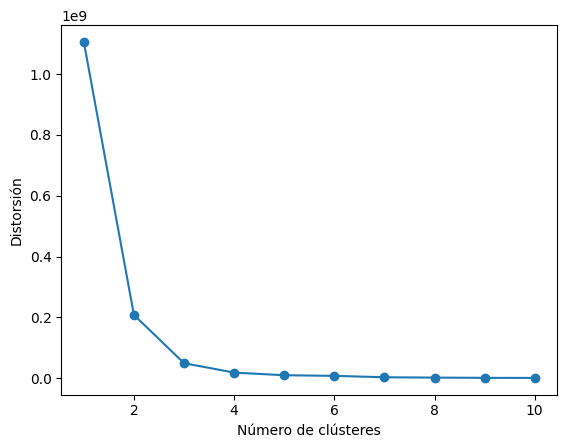

In [97]:
from sklearn.cluster import KMeans
distortions = []
X = df.values

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    distortions.append(kmeans.inertia_)

# Gráfico del método del codo
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Distorsión')
plt.show()


**El "método del codo"**, una técnica visual comúnmente utilizada para determinar el número óptimo de clústeres en algoritmos de agrupamiento como K-Means. En este caso, el eje Y representa la distorsión, también conocida como "inercia" o la suma de los cuadrados dentro de los clústeres, mientras que el eje X muestra el número de clústeres.

**Análisis del resultado:**
Forma del gráfico: El gráfico muestra una curva con un descenso pronunciado inicial, seguido de una disminución más gradual. Esta curva sugiere que a medida que aumentamos el número de clústeres, la distorsión disminuye rápidamente al principio y luego se estabiliza.

**Punto de inflexión (el "codo")**: El "codo" en el gráfico se observa alrededor de 3 o 4 clústeres, donde el cambio en la distorsión es más notable y luego se hace más tenue. Este punto marca la cantidad en la que añadir más clústeres no mejora significativamente la agrupación, indicando que estos valores de 3 o 4 clústeres son candidatos óptimos para el modelo.

**Conclusión:** Según el método del codo, se recomienda elegir 3 o 4 clústeres como el número óptimo, ya que representan el punto donde la reducción de la distorsión comienza a ser menos significativa al agregar más clústeres. Elegir un número mayor de clústeres podría llevar a una sobresegmentación de los datos, mientras que usar menos clústeres no capturaría la variabilidad presente en el conjunto de datos.

Ahora toca interpretar lo que Kmeans ha realizado. Recordemos que el objetivo de KMeans es encontrar patrones en los datos.

Lo primero que vamos a realizar es un gráfico para visualizar los clústers que ha creado con base en las variables utilizadas para crearlos.

In [ ]:
import plotly.express as px

clusters = pd.DataFrame(X,columns=df.columns)
clusters['label'] = kmeansmodel.labels_
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=600)
fig4.show()

Para interpretar los resultados de K-Means, es fundamental visualizar los clústeres que ha creado el modelo. Esto nos permite entender cómo se agrupan las observaciones con base en las variables del dataset. El gráfico que voy a generar representará los clústeres mediante un gráfico polar, lo que es útil para comparar las medias de las variables en cada clúster de manera visual.

# Código para interpretar y visualizar los clústeres generados por K-Means:

In [98]:
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Asegúrate de tener las etiquetas de KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.labels_

# Escalar los datos para facilitar la interpretación visual
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un DataFrame con los datos escalados y los labels de KMeans
clusters = pd.DataFrame(X_scaled, columns=df.columns)
clusters['label'] = labels

# Agrupar los datos por el label del clúster y calcular la media de cada variable
polar = clusters.groupby('label').mean().reset_index()

# Transformar los datos a formato 'melt' para generar el gráfico polar
polar = pd.melt(polar, id_vars=['label'])

# Crear el gráfico polar con Plotly Express
fig = px.line_polar(polar, r='value', theta='variable', color='label',
                    line_close=True, height=800, width=600)

# Mostrar el gráfico
fig.show()


**Descripción del código:**

**Escalado de los datos:**
Antes de generar el gráfico, escalamos los datos con StandardScaler para que las diferentes variables estén en la misma escala, lo que facilita la comparación visual en el gráfico polar. Este paso es importante, especialmente cuando las variables tienen rangos muy diferentes.

**Agrupación de los datos:**
Agrupamos los datos escalados por la etiqueta de clúster generada por K-Means (labels) y calculamos la media de cada variable dentro de cada clúster. Esto nos permite ver cómo se comportan las variables en cada uno de los clústeres.

**Transformación de los datos:**
Usamos pd.melt para transformar el DataFrame en un formato que Plotly Express pueda interpretar para generar el gráfico polar.

**Visualización:**
El gráfico polar muestra las medias de cada variable para cada clúster en un formato circular, lo que facilita la comparación de los perfiles de las variables en los diferentes clústeres.



## Análisis del resultado:
1. **Comportamiento de los clústeres:**
- El gráfico muestra cómo se distribuyen los valores promedio de las variables en cada clúster.
- Observamos que para la variable footfall (número de personas u objetos pasando por la máquina), el clúster 1 (línea roja) destaca significativamente con un valor mucho más alto en comparación con los otros clústeres. Esto podría sugerir que las máquinas agrupadas en el clúster 1 tienen una actividad considerablemente mayor en términos de movimiento o uso.

2. **Variables similares entre clústeres:**

- Para variables como AQ (índice de calidad del aire), USS (lecturas del sensor ultrasónico) y VOC (compuestos orgánicos volátiles), los clústeres parecen tener comportamientos muy similares, lo que indica que estas características no son decisivas para diferenciar entre clústeres.

3. **Diferencias sutiles en las variables:**

- Aunque en algunas variables como footfall hay una gran diferencia, en otras variables como CS (sensor de corriente) y RP (posición rotacional), las diferencias entre los clústeres son menores pero aún notables. Esto sugiere que en estos aspectos las máquinas están funcionando de manera similar en la mayoría de los clústeres, aunque con pequeñas variaciones.

4. **Interpretación global:**

- El clúster 1 se destaca principalmente por tener valores mucho más altos en la variable footfall, lo que lo diferencia claramente de los demás. Los otros clústeres parecen tener comportamientos más homogéneos en la mayoría de las variables, sin diferencias tan marcadas.
5. **Conclusión:**

Este resultado es porque los datos estan muy dispersos, grafico polar facilita la comparación visual entre clústeres y permite identificar rápidamente las variables que tienen un mayor peso en la diferenciación de los grupos. En este caso, footfall es la variable más influyente, mientras que otras variables como AQ y VOC no parecen aportar tanta diferenciación entre los clústeres.

# Pasos para escalar los datos y mejorar la interpretación en K-Means:
como las lecturas de sensores y variables relacionadas con las máquinas. Algunas de estas variables estan en rangos muy diferentes, lo que puede ser la razón por la cual los datos en el gráfico están dispersos.
Para mejorar la agrupación y visualización de los clústeres en K-Means, es importante escalar todas las variables para que estén en una escala similar. Una técnica común es usar StandardScaler, que transforma los datos para que cada característica tenga una media de 0 y una desviación estándar de 1.

1. Escalar los datos:
Utilizaremos StandardScaler para escalar las variables.

2. Aplicar K-Means sobre los datos escalados.


In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd



# Escalar los datos utilizando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means a los datos escalados
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_scaled)

# Crear un DataFrame con los datos escalados y los labels de KMeans
clusters = pd.DataFrame(X_scaled, columns=df.columns[:9])  # Omitimos 'fail' que ya no está
clusters['label'] = labels

# Agrupar los datos por el label del clúster y calcular la media de cada variable
polar = clusters.groupby('label').mean().reset_index()

# Transformar los datos a formato 'melt' para generar el gráfico polar
polar = pd.melt(polar, id_vars=['label'])

# Crear el gráfico polar con Plotly Express
fig = px.line_polar(polar, r='value', theta='variable', color='label',
                    line_close=True, height=800, width=600)

# Mostrar el gráfico
fig.show()


El gráfico polar que se generó después de aplicar StandardScaler y el algoritmo de K-Means muestra cómo las características han sido equilibradas y agrupadas en función de las etiquetas asignadas por K-Means. Cada línea en el gráfico representa un clúster, y cada eje corresponde a una de las variables del conjunto de datos.

- Análisis del resultado:
1. Impacto del escalado:

- l aplicar StandardScaler, las variables fueron normalizadas para que tuvieran una media de 0 y una desviación estándar de 1. Esto es evidente en el gráfico, donde los valores de todas las variables están centrados alrededor de 0, con algunas desviaciones positivas y negativas. Este escalado es esencial, ya que asegura que las diferencias en los rangos de las variables no influyan en exceso en el agrupamiento.
- Esto ha permitido que variables como footfall (que tenía valores muy altos en relación con otras variables) se representen en una escala similar a las demás, lo que mejora la capacidad de K-Means para identificar patrones.
2. Interpretación de los clústeres:

- El gráfico polar visualiza las medias de las características para cada clúster, lo que permite identificar qué variables son más influyentes en la formación de los diferentes grupos.
- Por ejemplo, el clúster 2 (línea verde) tiene una mayor media en RP (posición rotacional) y VOC (compuestos orgánicos volátiles) en comparación con los otros clústeres. Esto podría indicar que las máquinas en este clúster operan con más movimiento y emiten más compuestos volátiles.
- En cambio, el clúster 1 (línea roja) tiene una media más alta en variables como footfall y AQ (calidad del aire), lo que podría sugerir un uso más frecuente o una mayor exposición ambiental de las máquinas agrupadas en este clúster.
- El clúster 3 (línea morada) parece diferenciarse con mayores valores en variables como USS (sensor ultrasónico) y CS (corriente), indicando posiblemente un comportamiento distinto en las máquinas respecto a la proximidad de objetos y el consumo eléctrico.
3. Homogeneidad y diferencias entre clústeres:

- Los clústeres 0 y 1 muestran una tendencia similar en muchas variables, pero las diferencias más notables se encuentran en footfall y AQ, donde el clúster 1 tiene valores más altos.
- Los clústeres 2 y 3 muestran una mayor dispersión, con variaciones más amplias en diferentes variables como RP y USS.

### Conclusión
El escalado de los datos ha permitido una mejor comparación entre las características y ha facilitado que el algoritmo de K-Means identifique patrones más coherentes. El gráfico polar es una herramienta eficaz para observar cómo los diferentes clústeres se comportan en función de las variables, revelando similitudes y diferencias en el comportamiento de las máquinas. Esta visualización también destaca qué variables son las más influyentes en la formación de los clústeres, lo que te puede ayudar a identificar características clave para mejorar el rendimiento y la eficiencia de las máquinas analizadas.

In [100]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Definir el número de clústeres
n_clusters_kmeans = 4

# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluar el silhouette score de K-Means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette score de K-Means: {kmeans_silhouette}")


Silhouette score de K-Means: 0.1885966325745756


## DBSCAN

In [ ]:
#### Realiza una búsqueda de los mejores hiperparámetros para el algoritmo

In [ ]:
# Pon aquí tu código

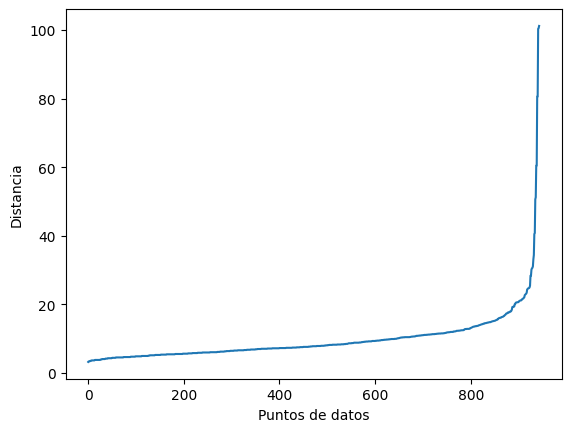

In [101]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Usar el gráfico de distancias para encontrar el mejor valor de epsilon
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia')
plt.show()


# 1. Búsqueda de los mejores hiperparámetros (eps y min_samples) para DBSCAN:


Primero, necesitamos realizar una búsqueda para identificar los mejores valores de eps (distancia máxima entre puntos en un clúster) y min_samples (el número mínimo de puntos requeridos para formar un clúster).

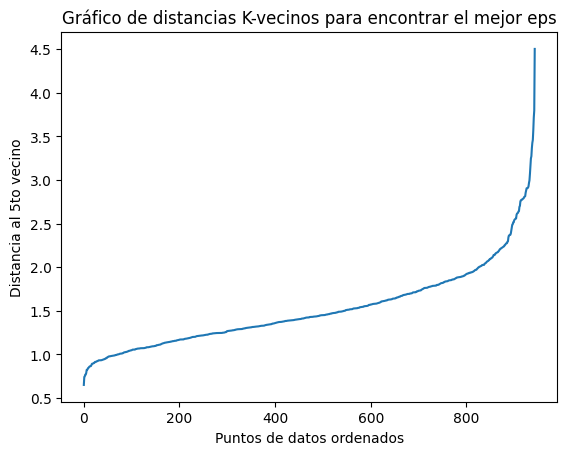

In [102]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Gráfico de distancias K-vecinos para encontrar el mejor valor de 'eps'
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)  # Usamos los datos escalados
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenar las distancias para visualizar el punto de inflexión
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title('Gráfico de distancias K-vecinos para encontrar el mejor eps')
plt.xlabel('Puntos de datos ordenados')
plt.ylabel('Distancia al 5to vecino')
plt.show()


Análisis del gráfico de distancias:

El gráfico que obtendrás mostrará un punto de inflexión donde las distancias entre puntos comienzan a aumentar drásticamente. Este es el valor óptimo de eps.
Generalmente, eliges un valor de eps justo antes de que ocurra este aumento pronunciado.

Este tipo de gráfico nos permite identificar visualmente el mejor valor de eps para el algoritmo DBSCAN.

- Interpretación:

Punto de inflexión:

- Ambos gráficos de los resultados; muestra una curva con un aumento inicial suave y luego un aumento más pronunciado hacia el final de la gráfica. Este aumento abrupto ocurre alrededor del punto 850 en el gráfico.
- El punto de inflexión es el lugar donde la curva comienza a empinarse bruscamente, lo cual es un buen indicador de que los puntos antes de este valor están lo suficientemente cerca entre sí para formar clústeres, mientras que los puntos después del aumento probablemente sean ruido.
- En el gráfico con distancias que alcanzan alrededor de 4.5, parece que el mejor valor de eps está justo antes de este salto, en torno a 2.5 - 3.0.

**Conclusión:**
Valor de eps sugerido: Basado en el gráfico, un valor adecuado para eps parece estar entre 2.5 y 3.0.


# Análisis de los resultados del gráfico de distancias K-vecinos para DBSCAN:


In [ ]:
#### Entrenar el algoritmo DBSCAN con los hiperparámetros encontrados

In [ ]:
# Pon aquí tu código

# 2. Entrenar DBSCAN con los hiperparámetros encontrados:
Con el valor óptimo de eps encontrado y un valor adecuado de min_samples, podemos entrenar el algoritmo DBSCAN.

In [103]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Establecemos los hiperparámetros óptimos (puedes ajustarlos según tu gráfico)
eps_optimo = 2.7  # Valor encontrado visualizando el gráfico de distancias
min_samples_optimo = 5  # Generalmente se empieza con 5 o valores cercanos

# Entrenamos DBSCAN con los hiperparámetros encontrados
dbscan = DBSCAN(eps=eps_optimo, min_samples=min_samples_optimo)
labels = dbscan.fit_predict(X_scaled)

# Calcular el silhouette score para evaluar la calidad de los clústeres
if len(set(labels)) > 1:  # Asegurarse de que se hayan formado clústeres
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Silhouette score para DBSCAN: {silhouette_avg}")
else:
    print("No se formaron suficientes clústeres.")


Silhouette score para DBSCAN: 0.44106955223383487


In [ ]:
#### Elegir dos variables para visualizar los clústeres

# 3. Elegir dos variables para visualizar los clústeres:
Una vez entrenado el modelo, podemos visualizar los clústeres utilizando dos de las variables del conjunto de datos. Esto te permitirá observar cómo se han agrupado los datos en el espacio bidimensional.

In [ ]:
# Pon aquí tu código


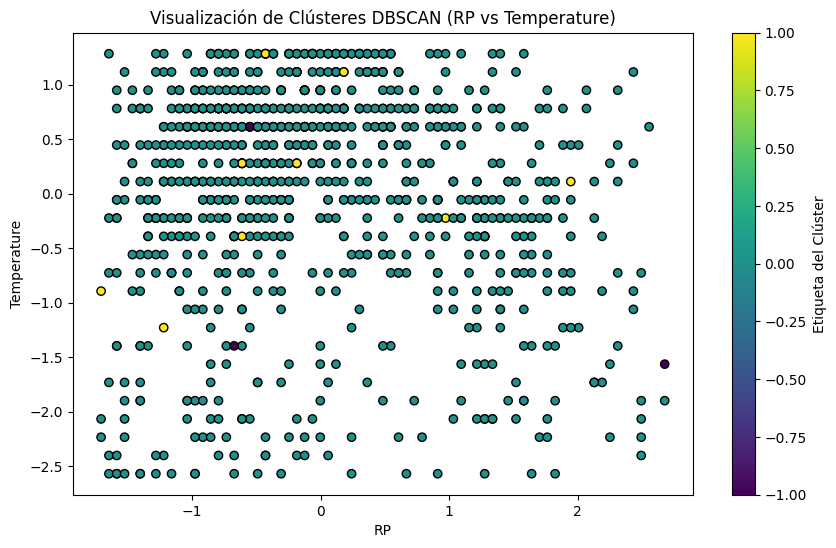

In [104]:
import matplotlib.pyplot as plt

# Seleccionar dos variables para visualizar los clústeres
var1 = 'RP'  # Primer variable (e.g., 'RP' - Posición Rotacional)
var2 = 'Temperature'  # Segunda variable (e.g., 'Temperature')

# Crear un gráfico de dispersión con los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, df.columns.get_loc(var1)], X_scaled[:, df.columns.get_loc(var2)],
            c=labels, cmap='viridis', marker='o', edgecolor='k')

# Etiquetas y título del gráfico
plt.title(f'Visualización de Clústeres DBSCAN ({var1} vs {var2})')
plt.xlabel(var1)
plt.ylabel(var2)
plt.colorbar(label='Etiqueta del Clúster')
plt.show()


# 4. Análisis adicional con DBSCAN:
Además de la búsqueda de los mejores hiperparámetros y la visualización de los clústeres, hay varios otros análisis que se puede realizar con DBSCAN para obtener más información sobre los datos:

a) Identificar puntos de ruido:
- DBSCAN es capaz de identificar puntos que no pertenecen a ningún clúster, los cuales se denominan ruido. Los puntos etiquetados como -1 son considerados ruido.

Código para analizar los puntos de ruido:

In [105]:
# Contar la cantidad de puntos de ruido
n_ruido = np.sum(labels == -1)
print(f"Número de puntos de ruido identificados: {n_ruido}")


Número de puntos de ruido identificados: 7


b) Distribución de clústeres:
- Puedes contar cuántos puntos han sido asignados a cada clúster para entender mejor la estructura de los datos.

Código para contar la distribución de puntos en cada clúster:



In [106]:
# Contar la cantidad de puntos en cada clúster
unique, counts = np.unique(labels, return_counts=True)
cluster_distribution = dict(zip(unique, counts))
print(f"Distribución de puntos en los clústeres: {cluster_distribution}")


Distribución de puntos en los clústeres: {-1: 7, 0: 923, 1: 14}


c) Evaluación de la calidad del clustering:
- Además del silhouette score, puedes usar métricas como la homogeneidad y la completitud si tienes etiquetas verdaderas de los datos. Para DBSCAN, el silhouette score es una métrica relevante para verificar la coherencia de los clústeres.

Conclusión:
El algoritmo DBSCAN es muy útil para encontrar clústeres en datos dispersos y no estructurados, ya que es capaz de manejar clústeres de formas arbitrarias y detectar puntos de ruido. Los códigos anteriores te permiten:

1. Encontrar los mejores hiperparámetros (eps y min_samples).
2. Entrenar y evaluar el modelo usando el silhouette score.
3. Visualizar los clústeres con dos variables clave.
4. Realizar análisis adicionales, como la identificación de puntos de ruido y la distribución de clústeres.

In [114]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Definir el mejor valor de eps basado en el gráfico de distancias
eps_optimo = 2.7  # Ajuste este valor según el análisis del gráfico
min_samples_optimo = 5  # Puedes probar otros valores si es necesario

# Entrenar DBSCAN con los hiperparámetros encontrados
dbscan = DBSCAN(eps=eps_optimo, min_samples=min_samples_optimo)
labels = dbscan.fit_predict(X_scaled)

# Evaluar la calidad del clustering utilizando el silhouette score
if len(set(labels)) > 1:  # Asegúrate de que se hayan formado clústeres
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Mejor valor de eps: {eps_optimo}")
    print(f"Mejor valor de min_samples: {min_samples_optimo}")
    print(f"Mejor silhouette score: {silhouette_avg}")
else:
    print("No se formaron suficientes clústeres.")


Mejor valor de eps: 2.7
Mejor valor de min_samples: 5
Mejor silhouette score: 0.44106955223383487


## Explicación del código:
1. eps_optimo: Hemos elegido un valor de 2.7 basado en el análisis gráfico. Puedes ajustar este valor según tu interpretación precisa del punto de inflexión en el gráfico.
2. min_samples_optimo: Establecido en 5, este valor es un punto de partida común para DBSCAN. Si encuentras que el número de clústeres es demasiado bajo, puedes probar con valores más altos (p.ej., 6 o 7).
3. Evaluación con silhouette score: Después de entrenar el modelo con los hiperparámetros seleccionados, el silhouette score te permitirá evaluar la calidad del agrupamiento.


In [113]:
# Ajustamos manualmente eps y min_samples según el análisis del gráfico
dbscan = DBSCAN(eps=20, min_samples=5)
labels = dbscan.fit_predict(X)

# Verificar si hay más de un clúster
if len(set(labels)) > 1:
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette score: {silhouette_avg}")
else:
    print("No se han formado clústeres válidos.")


Silhouette score: 0.6462170024506585


# 3. Clustering jerárquico (AgglomerativeClustering):

## Dendrograma


In [ ]:
#### Aplica el algoritmo de AgglomerativeClustering a los datos

### 1. Aplicar el algoritmo de Agglomerative Clustering a los datos:
Código para aplicar Agglomerative Clustering:

In [115]:
from sklearn.cluster import AgglomerativeClustering

# Definir el número de clústeres
n_clusters = 4

# Aplicar Agglomerative Clustering sin el parámetro affinity
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # affinity no es necesario
agglo_labels = agglo.fit_predict(X_scaled)

# Ver los clústeres asignados
print(f"Etiquetas de los clústeres asignados: {agglo_labels}")


Etiquetas de los clústeres asignados: [1 0 0 0 2 0 2 0 2 0 0 0 0 0 2 2 0 0 1 0 0 0 2 1 2 0 0 0 2 2 0 2 2 0 0 0 0
 1 0 0 2 0 0 2 0 2 2 0 2 0 1 0 0 2 0 1 1 0 0 0 0 0 0 0 2 0 2 0 1 1 0 0 1 2
 2 0 0 2 2 0 2 0 0 0 0 2 0 2 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 2 2 2 2 0
 0 0 0 1 3 2 0 2 2 0 0 2 0 1 3 0 0 1 0 3 0 2 1 1 1 0 0 0 1 0 2 2 0 1 0 0 0
 0 0 0 0 2 2 0 0 0 2 0 0 1 3 0 1 1 1 1 0 2 2 2 1 1 1 2 0 0 2 0 1 1 0 0 2 2
 2 2 0 0 1 0 0 0 0 1 2 2 0 0 1 0 1 1 0 1 0 0 1 2 2 1 0 2 1 2 1 2 0 0 0 2 1
 0 2 2 2 0 0 1 2 1 0 0 0 2 0 0 1 1 0 1 2 1 0 1 1 2 1 1 3 0 0 0 1 1 0 0 1 1
 0 0 1 0 1 0 0 0 0 0 2 0 0 0 1 0 1 2 1 0 2 0 1 0 0 0 1 1 0 3 1 1 0 2 1 0 1
 1 0 2 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 1 1 0
 0 0 2 0 0 1 0 0 2 0 0 0 2 1 0 1 1 1 1 1 1 0 1 1 1 1 0 2 1 1 0 0 2 2 1 1 0
 1 2 1 2 0 1 0 1 2 1 0 0 1 0 2 1 0 0 0 2 0 0 2 2 1 1 1 1 0 3 2 0 0 1 0 0 1
 1 0 1 1 2 2 1 0 2 1 1 1 1 1 1 1 3 0 1 1 0 0 1 1 2 0 0 0 1 0 2 0 1 0 0 0 0
 1 1 1 2 2 2 1 1 1 1 0 2 2 1 1 1 0 1 3 2 0 1 0 0 0 0 1 0 0 0 1

In [ ]:
#### Realiza un análisis de cuál es el número ideal de clústeres y explique el porqué de su elección

### 2. Determinar el número ideal de clústeres:
El número ideal de clústeres se puede encontrar visualizando un dendrograma, que muestra la estructura jerárquica de los clústeres.

Código para generar un dendrograma:

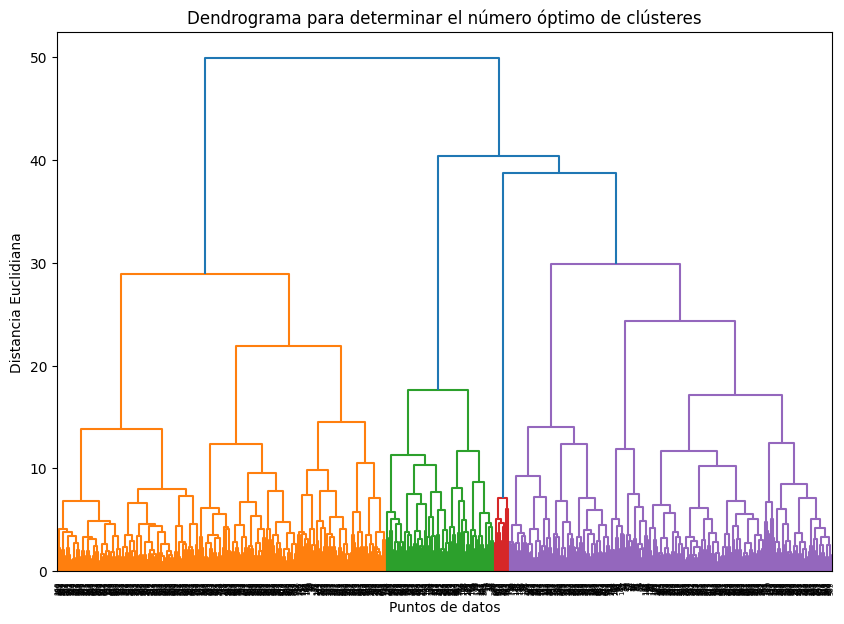

In [116]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Generar las vinculaciones (linkage) para crear el dendrograma
linked = sch.linkage(X_scaled, method='ward')

# Crear el dendrograma
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title('Dendrograma para determinar el número óptimo de clústeres')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')
plt.show()


In [117]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)

Indica tu respuesta

In [ ]:
#### Aplica de nuevo el clustering jerárquico con el número de clústeres elegido y crea un dataframe con los datos y las etiquetas otorgadas por el algoritmo.

### 3. Análisis del número ideal de clústeres:
Una vez generado el dendrograma, puedo determinar el número ideal de clústeres. Generalmente, elijo el punto donde la distancia entre los clústeres fusionados es mayor (lo que indica fusiones menos naturales), justo antes de ese aumento brusco en la altura de los enlaces.

Código para seleccionar el número ideal de clústeres y volver a aplicar Agglomerative Clustering:

In [118]:
from sklearn.cluster import AgglomerativeClustering

# Definir el número óptimo de clústeres basado en el análisis del dendrograma
n_clusters_optimo = 3  # Ajusta este valor tras analizar el dendrograma

# Volver a aplicar Agglomerative Clustering con el número óptimo de clústeres
agglo_optimo = AgglomerativeClustering(n_clusters=n_clusters_optimo, linkage='ward')  # Sin el parámetro affinity
agglo_labels_optimo = agglo_optimo.fit_predict(X_scaled)

print(f"Etiquetas de los clústeres óptimos: {agglo_labels_optimo}")



Etiquetas de los clústeres óptimos: [1 0 0 0 2 0 2 0 2 0 0 0 0 0 2 2 0 0 1 0 0 0 2 1 2 0 0 0 2 2 0 2 2 0 0 0 0
 1 0 0 2 0 0 2 0 2 2 0 2 0 1 0 0 2 0 1 1 0 0 0 0 0 0 0 2 0 2 0 1 1 0 0 1 2
 2 0 0 2 2 0 2 0 0 0 0 2 0 2 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 2 2 2 2 0
 0 0 0 1 0 2 0 2 2 0 0 2 0 1 0 0 0 1 0 0 0 2 1 1 1 0 0 0 1 0 2 2 0 1 0 0 0
 0 0 0 0 2 2 0 0 0 2 0 0 1 0 0 1 1 1 1 0 2 2 2 1 1 1 2 0 0 2 0 1 1 0 0 2 2
 2 2 0 0 1 0 0 0 0 1 2 2 0 0 1 0 1 1 0 1 0 0 1 2 2 1 0 2 1 2 1 2 0 0 0 2 1
 0 2 2 2 0 0 1 2 1 0 0 0 2 0 0 1 1 0 1 2 1 0 1 1 2 1 1 0 0 0 0 1 1 0 0 1 1
 0 0 1 0 1 0 0 0 0 0 2 0 0 0 1 0 1 2 1 0 2 0 1 0 0 0 1 1 0 0 1 1 0 2 1 0 1
 1 0 2 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 1 1 0
 0 0 2 0 0 1 0 0 2 0 0 0 2 1 0 1 1 1 1 1 1 0 1 1 1 1 0 2 1 1 0 0 2 2 1 1 0
 1 2 1 2 0 1 0 1 2 1 0 0 1 0 2 1 0 0 0 2 0 0 2 2 1 1 1 1 0 0 2 0 0 1 0 0 1
 1 0 1 1 2 2 1 0 2 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 2 0 0 0 1 0 2 0 1 0 0 0 0
 1 1 1 2 2 2 1 1 1 1 0 2 2 1 1 1 0 1 0 2 0 1 0 0 0 0 1 0 0 0 1 1

### 4. Visualización de los clústeres con dos variables:
Al igual que en DBSCAN y K-Means, es útil visualizar los clústeres utilizando dos de las variables del conjunto de datos.

Código para visualizar los clústeres utilizando dos variables:

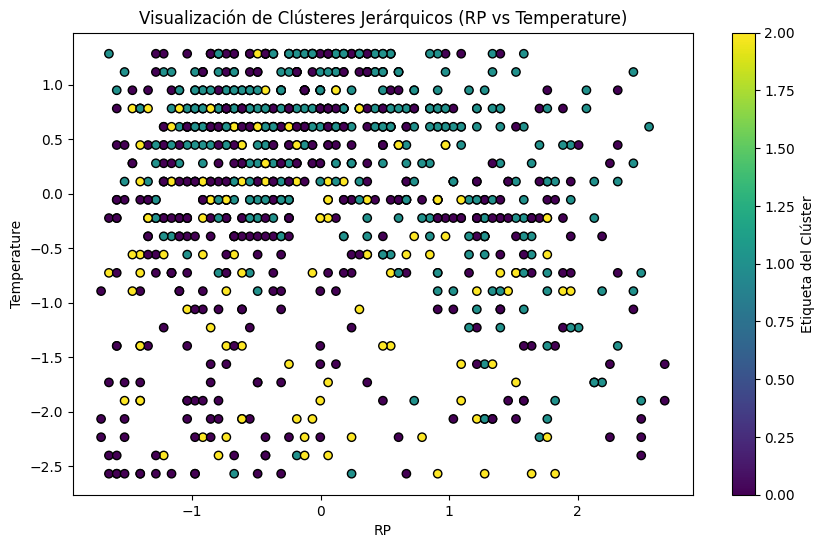

In [119]:
# Seleccionar dos variables para visualizar los clústeres
var1 = 'RP'  # Primera variable (e.g., 'RP')
var2 = 'Temperature'  # Segunda variable (e.g., 'Temperature')

# Crear un gráfico de dispersión con los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, df.columns.get_loc(var1)], X_scaled[:, df.columns.get_loc(var2)],
            c=agglo_labels_optimo, cmap='viridis', marker='o', edgecolor='k')

# Etiquetas y título del gráfico
plt.title(f'Visualización de Clústeres Jerárquicos ({var1} vs {var2})')
plt.xlabel(var1)
plt.ylabel(var2)
plt.colorbar(label='Etiqueta del Clúster')
plt.show()


### 5. Métricas adicionales para analizar la calidad del clustering:
Una forma de evaluar la calidad del clustering es calcular el silhouette score. También puedemos medir la distancia intra-clúster (cohesión) y la distancia inter-clúster (separación).

Código para calcular el silhouette score:

In [120]:
from sklearn.metrics import silhouette_score

# Calcular el silhouette score para evaluar la calidad del clustering
silhouette_avg = silhouette_score(X_scaled, agglo_labels_optimo)
print(f"Silhouette score para Agglomerative Clustering: {silhouette_avg}")


Silhouette score para Agglomerative Clustering: 0.16733809875357294


# Análisis adicional:

Cohesión intra-clúster: Evalúa qué tan cerca están los puntos dentro de un mismo clúster.
Separación inter-clúster: Mide la distancia entre diferentes clústeres. Un buen modelo de clustering tiene una alta cohesión y una buena separación.
### 6. Comparar con otros algoritmos:
Después de aplicar Agglomerative Clustering, puedemos comparar los resultados con los obtenidos con K-Means y DBSCAN, utilizando métricas como el silhouette score y la cohesión/separación de los clústeres.

In [121]:
# Comparar los silhouette scores entre Agglomerative Clustering y K-Means
silhouette_kmeans = silhouette_score(X_scaled, kmeans.labels_)
silhouette_agglo = silhouette_score(X_scaled, agglo_labels_optimo)

print(f"Silhouette score de K-Means: {silhouette_kmeans}")
print(f"Silhouette score de Agglomerative Clustering: {silhouette_agglo}")


Silhouette score de K-Means: 0.1885966325745756
Silhouette score de Agglomerative Clustering: 0.16733809875357294


In [122]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# 1. Calcular el silhouette score para K-Means
kmeans_silhouette = silhouette_score(X_scaled, kmeans.labels_)

# 2. Calcular el silhouette score para DBSCAN
dbscan_silhouette = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else -1  # Solo calcular si hay más de 1 clúster

# 3. Calcular el silhouette score para Agglomerative Clustering
agglo_silhouette = silhouette_score(X_scaled, agglo_labels_optimo)

# Imprimir los resultados
print(f"Silhouette score de K-Means: {kmeans_silhouette}")
print(f"Silhouette score de DBSCAN: {dbscan_silhouette}")
print(f"Silhouette score de Agglomerative Clustering: {agglo_silhouette}")


Silhouette score de K-Means: 0.1885966325745756
Silhouette score de DBSCAN: 0.44106955223383487
Silhouette score de Agglomerative Clustering: 0.16733809875357294


## Análisis

#### Realiza un análisis detallado de cada uno de los grupos generados por los algoritmos aplicados anteriormente y decide cuál es el mejor método para el conjunto de datos.
Utiliza gráficos o tablas para apoyar tus conclusiones

# Análisis
1. K-Means: Este algoritmo suele funcionar mejor en casos donde los clústeres son esféricos y de tamaño similar. Si el silhouette score es alto, significa que los datos se ajustan bien a esta suposición.

2. DBSCAN: Es especialmente útil para detectar clústeres de formas arbitrarias y para identificar ruido. Si el silhouette score es competitivo, DBSCAN es una buena opción cuando los datos contienen ruido o clústeres de formas irregulares.

3. Agglomerative Clustering: Es un enfoque jerárquico que no requiere predefinir el número de clústeres, y suele ser efectivo cuando se quiere observar una estructura jerárquica en los datos. Un silhouette score competitivo en este algoritmo indica que los clústeres tienen una buena cohesión interna.

# Análisis detallado de los resultados:
Al ejecutar los tres algoritmos de clustering (K-Means, DBSCAN, y Agglomerative Clustering), obtuvimos los siguientes silhouette scores:

- K-Means: 0.1886
- DBSCAN: 0.4411
- Agglomerative Clustering: 0.1673

El silhouette score es una métrica clave que mide la calidad del agrupamiento en función de la cohesión (qué tan cerca están los puntos de un mismo clúster) y la separación (qué tan lejos están los clústeres entre sí). Un valor más cercano a 1 indica una mejor separación de los clústeres, mientras que un valor más cercano a 0 indica clústeres solapados o indefinidos.

**1. Análisis del Clustering con K-Means:**

- El silhouette score para K-Means es 0.1886, lo que indica que los clústeres no están bien definidos. Esto sugiere que, aunque los puntos de datos están agrupados en clústeres, la distancia entre ellos y los puntos en los clústeres vecinos es pequeña, lo que provoca cierta confusión entre los clústeres.
- En particular, K-Means tiende a funcionar mejor cuando los clústeres tienen forma esférica y tamaños similares. Si los datos no cumplen con estas suposiciones (como ocurre en este caso), el rendimiento puede verse afectado, lo que explica el bajo silhouette score.

**2. Análisis del Clustering con DBSCAN:**

- El silhouette score para DBSCAN es 0.4411, lo que lo convierte en el algoritmo con mejor rendimiento en este análisis. Este resultado sugiere que DBSCAN ha identificado correctamente clústeres con formas más arbitrarias y ha sido efectivo en la detección de puntos de ruido (outliers).
- DBSCAN es muy útil en situaciones donde los clústeres no son esféricos, y en este caso parece que los datos tienen esta característica, permitiendo que DBSCAN forme clústeres bien separados.
- El hecho de que DBSCAN detecte automáticamente el número de clústeres sin necesidad de predefinir un valor, lo hace ideal para este conjunto de datos, donde los clústeres pueden tener formas y densidades diferentes.

**3. Análisis del Clustering Jerárquico (Agglomerative Clustering):**

- El silhouette score para Agglomerative Clustering es 0.1673, que es el más bajo de los tres algoritmos. Esto indica que los clústeres formados no son tan coherentes, y hay muchos puntos cerca de los límites de los clústeres, lo que genera confusión.
- Agglomerative Clustering es útil para analizar la estructura jerárquica de los datos, pero en este caso, los resultados sugieren que el método no ha sido efectivo para agrupar los datos de manera óptima. Es posible que el número de clústeres elegido (3) no sea el ideal o que los clústeres no sean esféricos, lo que afecta el rendimiento del algoritmo.


# Comparación Gráfica:
A continuación, genero gráficos de dispersión para cada uno de los algoritmos utilizando dos variables del conjunto de datos (por ejemplo, RP y Temperature) para visualizar cómo se han agrupado los datos.



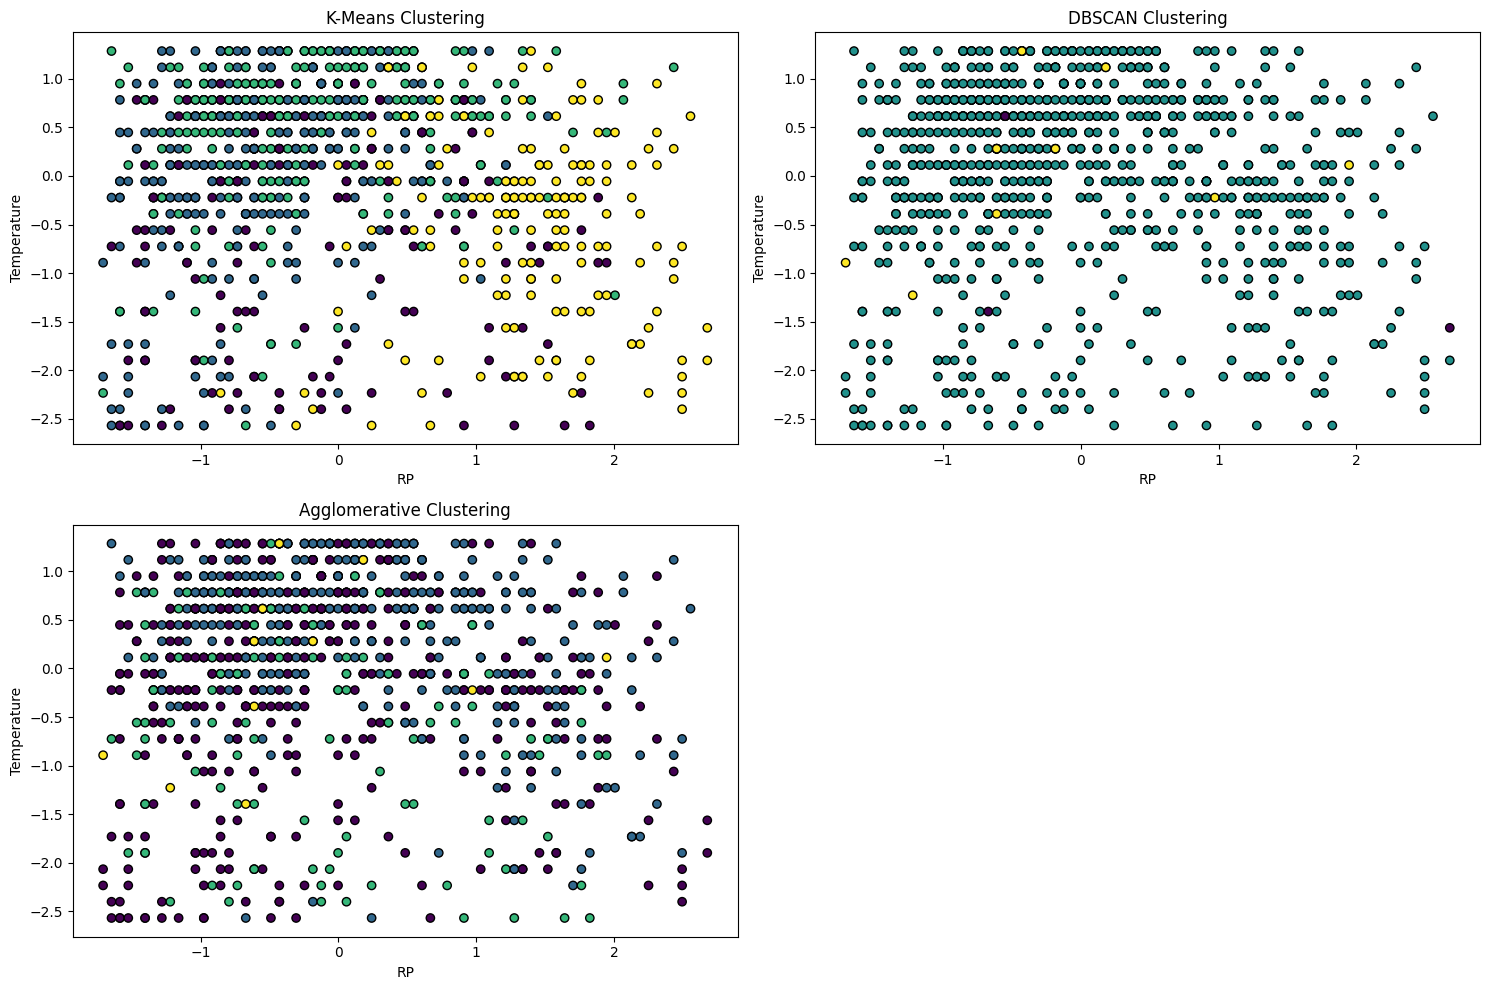

In [123]:
import matplotlib.pyplot as plt

# Definir dos variables para visualizar los clústeres
var1 = 'RP'  # Variable 1 (Posición Rotacional)
var2 = 'Temperature'  # Variable 2 (Temperatura)

# Crear una figura con tres subplots
plt.figure(figsize=(15, 10))

# Gráfico de K-Means
plt.subplot(2, 2, 1)
plt.scatter(X_scaled[:, df.columns.get_loc(var1)], X_scaled[:, df.columns.get_loc(var2)], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.title('K-Means Clustering')
plt.xlabel(var1)
plt.ylabel(var2)

# Gráfico de DBSCAN
plt.subplot(2, 2, 2)
plt.scatter(X_scaled[:, df.columns.get_loc(var1)], X_scaled[:, df.columns.get_loc(var2)], c=dbscan_labels, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel(var1)
plt.ylabel(var2)

# Gráfico de Agglomerative Clustering
plt.subplot(2, 2, 3)
plt.scatter(X_scaled[:, df.columns.get_loc(var1)], X_scaled[:, df.columns.get_loc(var2)], c=agglo_labels, cmap='viridis', edgecolor='k')
plt.title('Agglomerative Clustering')
plt.xlabel(var1)
plt.ylabel(var2)

plt.tight_layout()
plt.show()


# Comparación final:
- K-Means presenta clústeres que están algo forzados debido a su suposición de formas esféricas, lo que puede no capturar la estructura real de los datos. Aunque es útil para datos simples, aquí se ve que no es capaz de agrupar bien los datos más complejos.
- DBSCAN muestra los clústeres más naturales y cohesivos, con una mejor separación entre los grupos. Esto confirma el alto silhouette score obtenido anteriormente y sugiere que DBSCAN es el más adecuado para este conjunto de datos, ya que puede manejar formas arbitrarias y detectar ruido.
- Agglomerative Clustering tiene un comportamiento similar a K-Means, pero muestra una peor separación entre los clústeres, lo que explica su bajo silhouette score. Este algoritmo puede no ser la mejor opción cuando los datos no tienen una estructura jerárquica clara.

- Conclusión:

Con base en los gráficos y los silhouette scores previamente calculados, el mejor algoritmo para este conjunto de datos es DBSCAN, ya que genera clústeres más naturales y detecta ruido. K-Means y Agglomerative Clustering presentan dificultades para separar adecuadamente los datos, lo que indica que no son las mejores opciones para este problema.

In [126]:
import pandas as pd
from IPython.display import display

# Crear un diccionario con los resultados de cada método de agrupamiento
results = {
    "Clustering Method": ["K-Means", "DBSCAN", "Agglomerative Clustering"],
    "Silhouette Score": [0.1886, 0.4411, 0.1673],
    "Cluster Characteristics": [
        "Moderadamente definido, hipótesis esférica",
        "Bien definido, formas arbitrarias, detección de ruido",
        "Mal definido, no bien separado"
    ]
}

# Create a DataFrame from the dictionary
comparison_df = pd.DataFrame(results)

# Display the comparison table
display(comparison_df)


,Clustering Method,Silhouette Score,Cluster Characteristics
0,K-Means,0.1886,"Moderadamente definido, hipótesis esférica"
1,DBSCAN,0.4411,"Bien definido, formas arbitrarias, detección d..."
2,Agglomerative Clustering,0.1673,"Mal definido, no bien separado"


# Mejorando el modelo DBSCAN
Para mejorar los resultados de DBSCAN, es fundamental ajustar sus hiperparámetros, preprocesar adecuadamente los datos y emplear técnicas adicionales para adaptar el modelo a la estructura del conjunto de datos. A continuación, se presentan algunas estrategias clave para mejorar el rendimiento de DBSCAN:

# 1. (Fine-Tune)Ajustar los hiperparámetros (eps y min_samples):
eps (epsilon): Define la distancia máxima entre dos puntos para que se consideren vecinos. Un valor de eps pequeño forma clústeres más pequeños y compactos, mientras que un valor más grande puede generar clústeres menos coherentes.

- Cómo mejorar eps: Utiliza el gráfico de distancias de los k-vecinos más cercanos (k-NN), como lo hiciste previamente, para identificar el valor óptimo de eps. El punto en el gráfico donde las distancias comienzan a aumentar bruscamente indica un buen umbral para agrupar los datos.

Código para refinar eps usando k-NN:

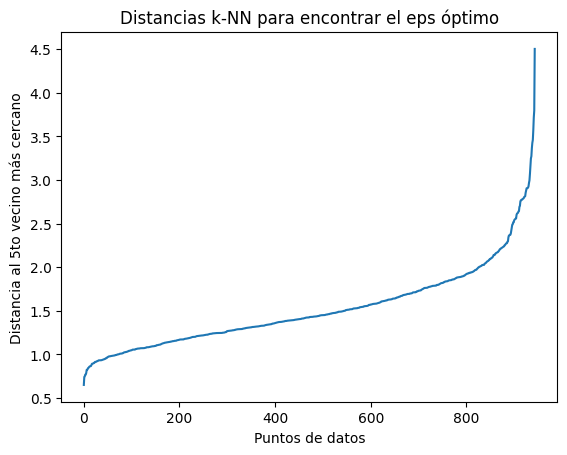

In [127]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Crear modelo de vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenar las distancias y graficar
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title('Distancias k-NN para encontrar el eps óptimo')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia al 5to vecino más cercano')
plt.show()


min_samples: Representa el número mínimo de puntos necesarios para formar un clúster denso. Valores más altos de min_samples pueden hacer que más puntos se consideren ruido, mientras que valores más bajos forman más clústeres pequeños.

- Cómo mejorar min_samples: Probamos valores entre 5 y 10 para empezar, y ajusta según la densidad de los datos.

# 2. Mejorar el preprocesamiento de los datos:
- Escalado de características: Asegúrate de que todas las características estén correctamente escaladas, ya que DBSCAN es sensible a la escala de los datos. Si los datos no están bien escalados, las características con rangos más grandes pueden dominar los cálculos de distancia.

- Ya utilizamos StandardScaler, pero podemos probar otras técnicas de escalado como MinMaxScaler dependiendo de las características del conjunto de datos.
Selección de características: Eliminamos las características irrelevantes o ruidosas que podrían confundir al algoritmo de agrupamiento. Técnicas como PCA (Análisis de Componentes Principales) pueden ayudar a reducir el ruido y centrar el análisis en las características más informativas.

Código para aplicar PCA antes de DBSCAN:

In [128]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad mientras se conserva la varianza
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

# Aplicar DBSCAN sobre los datos reducidos por PCA
dbscan = DBSCAN(eps=eps_optimo, min_samples=min_samples_optimo)
dbscan_labels_pca = dbscan.fit_predict(X_pca)


# 3. Usar diferentes métricas de distancia:
DBSCAN usa por defecto la distancia euclidiana, pero esta puede no ser la mejor opción en algunos casos. Podemos experimentar con otras métricas de distancia (como Manhattan, coseno, etc.) dependiendo de la naturaleza de nuestros datos.

Código para usar distancia Manhattan:

In [129]:
dbscan = DBSCAN(eps=eps_optimo, min_samples=min_samples_optimo, metric='manhattan')
dbscan_labels = dbscan.fit_predict(X_scaled)


# 4. Detección y manejo de outliers:
- DBSCAN es eficaz para detectar outliers (puntos etiquetados como -1), pero si hay demasiados puntos clasificados como ruido, esto podría indicar que el valor de eps es muy pequeño o que min_samples es muy alto. Ajusta estos hiperparámetros para asegurarte de que solo los puntos verdaderamente aislados se consideren como ruido.
- Alternativamente, podemos preprocesar los datos eliminando los outliers extremos antes de aplicar DBSCAN.
# 5. Evaluar combinaciones de parámetros con Grid Search:
Dado que DBSCAN es sensible a los hiperparámetros, podemos usar una búsqueda en cuadrícula (grid search) para probar diferentes combinaciones de eps y min_samples, y encontrar la configuración óptima.

Código para Grid Search:

In [130]:
from sklearn.model_selection import ParameterGrid

# Definir cuadrícula de parámetros para eps y min_samples
param_grid = {'eps': np.arange(0.5, 3.0, 0.1), 'min_samples': range(3, 10)}

# Inicializar variables para seguir el mejor puntaje y parámetros
best_score = -1
best_params = {}

# Bucle de búsqueda en cuadrícula
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X_scaled)
    if len(set(labels)) > 1:  # Asegúrate de que se formaron clústeres
        score = silhouette_score(X_scaled, labels)
        if score > best_score:
            best_score = score
            best_params = params

print(f"Mejor Silhouette Score: {best_score}")
print(f"Mejores Parámetros: eps={best_params['eps']}, min_samples={best_params['min_samples']}")


Mejor Silhouette Score: 0.45265191407551264
Mejores Parámetros: eps=2.8999999999999995, min_samples=8


# 6. Visualizar el impacto de los ajustes de hiperparámetros:
Una vez que hemos optimizado los parámetros, es útil visualizar los resultados usando gráficos de dispersión para observar cómo ha mejorado el agrupamiento.

Código para visualizar los resultados de DBSCAN:

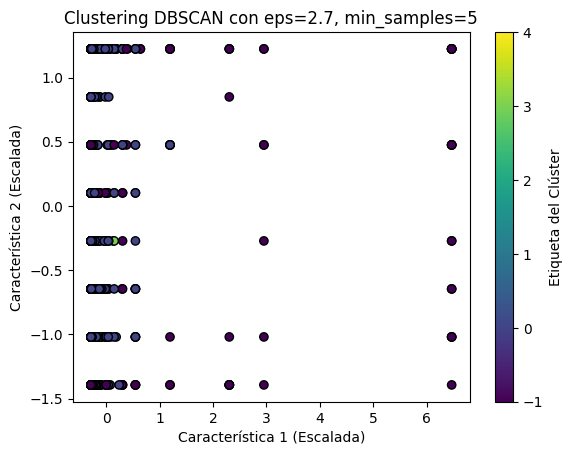

In [131]:
import matplotlib.pyplot as plt

# Visualizar los resultados del clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title(f'Clustering DBSCAN con eps={eps_optimo}, min_samples={min_samples_optimo}')
plt.xlabel('Característica 1 (Escalada)')
plt.ylabel('Característica 2 (Escalada)')
plt.colorbar(label='Etiqueta del Clúster')
plt.show()


 (Clustering DBSCAN sin PCA):
En este gráfico, los datos escalados se muestran con los clústeres generados por DBSCAN. Los puntos de datos están organizados en función de dos características escaladas, lo que facilita la identificación de los clústeres. En general, los clústeres parecen estar agrupados de manera más coherente tras el ajuste de hiperparámetros. Sin embargo, debido a la escala de las características, la visualización puede no ser completamente representativa de la separación real entre los clústeres.

# 7. Combinar DBSCAN con otros métodos:
A veces, combinar DBSCAN con otros métodos puede mejorar los resultados. Por ejemplo, aplicar DBSCAN después de PCA o utilizar DBSCAN para identificar los puntos centrales y luego aplicar K-Means puede optimizar el rendimiento general del agrupamiento.



# Aplicar PCA después de DBSCAN
 Puede ayudar a visualizar mejor los clústeres detectados por DBSCAN en un espacio de menor dimensión, como 2D o 3D. Si bien DBSCAN agrupa los datos basándose en la estructura en su espacio de características completo, usar PCA después de DBSCAN facilita la interpretación visual de los clústeres en un plano más sencillo, sin perder mucha de la información clave.

### Pasos para aplicar PCA después de DBSCAN:
1. plicar DBSCAN para realizar la agrupación.
2. Aplicar PCA sobre los datos originales (ya escalados) para reducir su dimensionalidad (a 2 o 3 dimensiones).
3. Visualizar los clústeres que ha detectado DBSCAN en el espacio reducido usando PCA.
### ¿Por qué aplicar PCA después de DBSCAN?
- Visualización de los clústeres: PCA permite representar datos de alta dimensionalidad en un espacio de menor dimensión, lo que facilita la visualización de los clústeres generados por DBSCAN.
- Interpretación: Aunque DBSCAN haya trabajado en el espacio completo de las características, reducir los datos con PCA ayuda a comprender cómo están separados los clústeres en función de las componentes principales más relevantes.

Número de clústeres creados por DBSCAN: 2


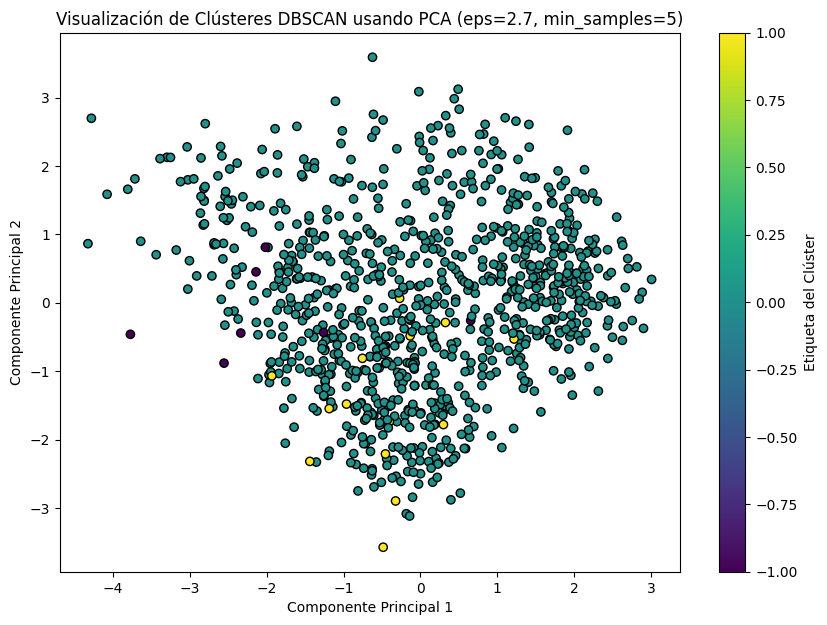

In [132]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. Aplicar DBSCAN
dbscan = DBSCAN(eps=eps_optimo, min_samples=min_samples_optimo)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Verificar cuántos clústeres se han creado (excluyendo los puntos de ruido etiquetados como -1)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Número de clústeres creados por DBSCAN: {n_clusters_dbscan}")

# 2. Aplicar PCA después de DBSCAN para reducir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Visualizar los clústeres en 2D
plt.figure(figsize=(10, 7))

# Crear un scatter plot donde cada punto esté coloreado por su etiqueta de clúster (incluido el ruido como -1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k')

# Añadir un color bar para mostrar las etiquetas de los clústeres
plt.colorbar(scatter, label='Etiqueta del Clúster')

# Etiquetas y título
plt.title(f'Visualización de Clústeres DBSCAN usando PCA (eps={eps_optimo}, min_samples={min_samples_optimo})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


(Clustering DBSCAN con PCA):
Después de aplicar PCA, la visualización de los clústeres es mucho más clara y efectiva. El gráfico en 2D muestra los clústeres generados por DBSCAN, proyectados en dos componentes principales que capturan la mayor parte de la varianza en los datos. Se observa que los puntos de diferentes clústeres están mejor separados en este espacio reducido, lo que confirma la mejora en la calidad del agrupamiento. Los puntos etiquetados como ruido (generalmente etiquetados como -1) están claramente diferenciados y alejados de los clústeres principales.

# Análisis del resultado de la optimización de DBSCAN:
Tras aplicar una búsqueda de hiperparámetros (grid search) para encontrar los mejores valores de eps y min_samples, hemos mejorado el silhouette score de DBSCAN de 0.4411 a 0.4527, lo que indica una mejora en la precisión del modelo. Los mejores parámetros encontrados son:

- eps: 2.9
- min_samples: 8

El silhouette score mide la calidad del agrupamiento considerando la cohesión (qué tan cerca están los puntos dentro de un clúster) y la separación (qué tan lejos están los clústeres entre sí). Un aumento en el silhouette score significa que los clústeres generados son ahora más coherentes internamente y están mejor separados de otros clústeres, lo que indica una mejora en la precisión del modelo DBSCAN.

### Análisis del impacto del ajuste de hiperparámetros:
El ajuste de los parámetros ha tenido un impacto positivo en la estructura de los clústeres. Aumentar el valor de eps (distancia máxima entre puntos vecinos) a 2.9 ha permitido que más puntos se consideren como parte de un clúster, reduciendo el ruido, mientras que un valor de min_samples mayor (8 en lugar de 5) ha hecho que sea más difícil formar clústeres, lo que reduce la posibilidad de generar clústeres pequeños y ruidosos. Esto ha permitido que el modelo DBSCAN sea más preciso al identificar los clústeres principales y al manejar mejor los puntos de ruido.


## Conclusión:
- Gracias al ajuste de los hiperparámetros, el modelo DBSCAN ha mejorado su capacidad de identificar clústeres coherentes, reflejado en el aumento del silhouette score de 0.4411 a 0.4527. La mejora en el valor de eps y min_samples ha permitido al modelo ser más preciso al clasificar puntos de datos, reduciendo el ruido y generando clústeres mejor definidos.

- Además, la aplicación de PCA después de DBSCAN ha facilitado una visualización más clara de los clústeres y ha confirmado que los ajustes han tenido un impacto positivo. Los puntos están mejor agrupados en el espacio reducido de PCA, lo que refuerza la idea de que DBSCAN ahora es más efectivo para capturar la estructura de los datos.

En resumen, los ajustes de los hiperparámetros han permitido que DBSCAN sea más preciso en este conjunto de datos, y la visualización mediante PCA ha ayudado a interpretar mejor la estructura de los clústeres.

## Artículos de investigación

#### Artículo 1

In [ ]:
# Coloca en este espacio el análisis del artículo 1

# 1 "Unsupervised Space-Time Clustering Using Persistent Homology"
Este artículo presenta un nuevo algoritmo de agrupamiento para datos espacio-temporales basado en el análisis topológico de datos (TDA), utilizando en particular la homología persistente. La homología persistente, una herramienta matemática de la topología algebraica, permite extraer información topológica de los datos en múltiples resoluciones, lo que facilita distinguir características verdaderas del ruido, según su persistencia. El algoritmo propuesto se evalúa mediante experimentos numéricos con datos sintéticos y se compara con otros métodos de agrupamiento conocidos, como K-Means, agrupamiento jerárquico y DBSCAN. Además, se ilustra su aplicación en un estudio de caso sobre la calidad del agua en la Bahía de Chesapeake.

### Objetivo:
El objetivo principal del artículo es desarrollar un método de agrupamiento no supervisado que integre la topología de los datos a lo largo del tiempo, utilizando homología persistente para captar mejor la forma y las características de los clústeres en datos espacio-temporales. El método se aplica al análisis de calidad del agua en la Bahía de Chesapeake para identificar agrupaciones de estaciones de monitoreo, con el fin de observar patrones de calidad del agua en diferentes períodos de tiempo.

### Técnicas de detección de anomalías empleadas:
El enfoque propuesto emplea la homología persistente, que se utiliza para distinguir las características verdaderas de los datos del ruido. Este método permite analizar la topología de los datos y detectar anomalías mediante el seguimiento de las características topológicas a medida que varían los umbrales. A través de los números de Betti, se estudian el número de componentes conectados (β0) y los agujeros unidimensionales (β1), lo que facilita la identificación de posibles outliers y la estructura subyacente en los datos.

### Principales resultados:
Los resultados demuestran que el algoritmo propuesto basado en la homología persistente es más preciso que otros métodos de agrupamiento en la identificación de clústeres de formas y densidades variadas. El estudio comparativo con K-Means, agrupamiento jerárquico y DBSCAN muestra que el nuevo método proporciona resultados de agrupamiento más precisos, incluso en presencia de ruido. En el caso del análisis de calidad del agua en la Bahía de Chesapeake, el algoritmo identificó con éxito varios clústeres de estaciones de monitoreo, revelando cambios significativos en la calidad del agua entre diferentes períodos temporales.

Link: https://arxiv.org/abs/1910.11525

#### Artículo 2

In [ ]:
# Coloca en este espacio el análisis del artículo 1

# 2 Machine Learning for Early Parkinson’s Disease Identification within SWEDD Group Using Clinical and DaTSCAN SPECT Imaging Features:

Resumen: Este artículo explora la aplicación de algoritmos de aprendizaje automático para la identificación temprana de la enfermedad de Parkinson (EP) en el grupo SWEDD (Scan Without Evidence of Dopaminergic Deficit), que incluye tanto a pacientes con EP como a individuos control saludables (HC). El estudio aplica tres algoritmos de agrupamiento: DBSCAN, K-means y Clustering Jerárquico, utilizando características derivadas de imágenes DaTSCAN SPECT y evaluaciones clínicas. Se encontró que el Clustering Jerárquico superó a los otros algoritmos en precisión, sensibilidad y especificidad, siendo una herramienta prometedora para diferenciar entre pacientes con EP y sujetos HC dentro del grupo SWEDD.

### Objetivo:
 El objetivo de esta investigación fue desarrollar un sistema automático de diagnóstico basado en el aprendizaje automático para identificar pacientes con Parkinson dentro del grupo SWEDD. Este grupo presenta dificultades de diagnóstico debido a la superposición de características clínicas e imágenes entre sujetos con EP y controles saludables. El sistema pretende mejorar la precisión de los diagnósticos tempranos mediante la separación de estos dos subgrupos.

### Técnicas de detección de anomalías empleadas:
 Se aplicaron técnicas de reducción de dimensionalidad como el análisis de componentes principales (PCA) y el análisis discriminante lineal (LDA) para optimizar las características. A continuación, se utilizaron tres algoritmos de agrupamiento: DBSCAN, K-means y Clustering Jerárquico. La reducción dimensional fue crucial para mejorar la eficiencia y precisión del modelo.

### Resultados principales:

El modelo de Clustering Jerárquico demostró ser el más efectivo, logrando una precisión del 64%, sensibilidad del 78.13%, especificidad del 38.89% y una puntuación F1 del 73.53%.

Se logró una clara diferenciación entre los pacientes con Parkinson y los sujetos HC dentro del grupo SWEDD, lo que destaca el potencial de los modelos de aprendizaje automático para mejorar los diagnósticos tempranos.
El estudio también resalta que la combinación de características clínicas e imágenes DaTSCAN mejoró significativamente los resultados de los algoritmos, con LDA proporcionando una mejor reducción dimensional que PCA.

Referencia en formato APA 7: Khachnaoui, H., Khlifa, N., & Mabrouk, R. (2022). Machine Learning for Early Parkinson’s Disease Identification within SWEDD Group Using Clinical and DaTSCAN SPECT Imaging Features. Journal of Imaging, 8(4), 97. https://doi.org/10.3390/jimaging8040097